## Modelo de recomendação Amazon Fashion

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sklearn

pd.set_option('float_format', '{:f}'.format)

# columns = ['item_id', 'user_id','rating', 'timestamp']

# df = pd.read_csv('AMAZON_FASHION.csv', sep=",", header=0, names=columns)

reviews = pd.read_json('Automotive_5.json', lines = True)

display(reviews.head(10))

# reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
# asin - ID of the product, e.g. 0000013714
# reviewerName - name of the reviewer
# vote - helpful votes of the review
# style - a disctionary of the product metadata, e.g., "Format" is "Hardcover"
# reviewText - text of the review
# overall - rating of the product
# summary - summary of the review
# unixReviewTime - time of the review (unix time)
# reviewTime - time of the review (raw)
# image - images that users post after they have received the product

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,False,"05 1, 2015",A8WEXFRWX1ZHH,0209688726,{'Color:': ' AC'},Goldengate,"After I wrote the below review, the manufactur...",Works well if you place phone in horizontally ...,1430438400,NaN,NaN
1,1,True,"04 19, 2018",ABCA1A8E4DGV1,0209688726,{'Color:': ' Blue'},noe,It sucks barely picks up anything definitely n...,sucks,1524096000,NaN,NaN
2,1,True,"04 16, 2018",A1NX8HM89FRQ32,0209688726,{'Color:': ' Black'},Eduard,"Well to write a short one, it blew 2 fuses of ...",Defective,1523836800,NaN,NaN
3,3,True,"04 13, 2018",A1X77G023NY0KY,0209688726,{'Color:': ' CA'},Lauren,I have absolutely no memory of buying this but...,Looks cool! Probably works,1523577600,NaN,NaN
4,5,True,"04 8, 2018",A3GK37JO2MGW6Q,0209688726,{'Color:': ' Black'},danny,it ok it does it job,Five Stars,1523145600,NaN,NaN
5,5,True,"03 24, 2018",AIY18YON1TWJJ,0209688726,{'Color:': ' Black'},Karen H.,Have 3 big dogs. this have been great for my F...,this have been great for my Ford transit connect,1521849600,NaN,NaN
6,3,True,"03 4, 2018",A2MPTQ85HBBNG2,0209688726,{'Color:': ' Black'},Giv,"Pros: Good attachments, nice long cord, can re...",Decent car vaccuum.,1520121600,NaN,NaN
7,2,True,"03 1, 2018",A1SPIM9Y6HUUSH,0209688726,{'Color:': ' Black'},Frank W.Brodeur,I have a 2017 outback and everytime I try to u...,Two Stars,1519862400,NaN,NaN
8,4,True,"02 22, 2018",A1Q6FHU6DA643L,0209688726,{'Color:': ' Black'},nutter1,very good suction will see how it lasts,Four Stars,1519257600,NaN,NaN
9,5,True,"01 29, 2018",A3MA15RJJ59OKG,0209688726,{'Color:': ' Black'},Daryl S.,"love it,works great ! wow !!",Five Stars,1517184000,NaN,NaN


In [104]:
reviews.shape

(1711519, 12)

In [105]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1711519 entries, 0 to 1711518
Data columns (total 12 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   overall         int64 
 1   verified        bool  
 2   reviewTime      object
 3   reviewerID      object
 4   asin            object
 5   style           object
 6   reviewerName    object
 7   reviewText      object
 8   summary         object
 9   unixReviewTime  int64 
 10  vote            object
 11  image           object
dtypes: bool(1), int64(2), object(9)
memory usage: 145.3+ MB


#### vendo informacoes de total de usuarios, produtos

In [106]:
print('usuarios: ', reviews['reviewerID'].nunique())
print('produtos: ', reviews['asin'].nunique())

usuarios:  193651
produtos:  79437


In [107]:
reviews.drop(['reviewerName', 'reviewTime', 'unixReviewTime', 'style', 'verified', 'image' ], axis=1, inplace=True)

#### pegando a media da avaliacao e a quantidade de vezes que cada produto aparece

In [108]:
count = reviews.groupby("asin", as_index=False).count()
mean = reviews.groupby("asin", as_index=False).mean()

dfMerged = pd.merge(reviews, count, how='right', on=['asin'])
dfMerged = pd.merge(dfMerged, mean, how='right', on=['asin'])
dfMerged


,overall_x,reviewerID_x,asin,reviewText_x,summary_x,vote_x,overall_y,reviewerID_y,reviewText_y,summary_y,vote_y,overall
0,4,A8WEXFRWX1ZHH,0209688726,"After I wrote the below review, the manufactur...",Works well if you place phone in horizontally ...,NaN,71,71,71,71,11,4.042254
1,1,ABCA1A8E4DGV1,0209688726,It sucks barely picks up anything definitely n...,sucks,NaN,71,71,71,71,11,4.042254
2,1,A1NX8HM89FRQ32,0209688726,"Well to write a short one, it blew 2 fuses of ...",Defective,NaN,71,71,71,71,11,4.042254
3,3,A1X77G023NY0KY,0209688726,I have absolutely no memory of buying this but...,Looks cool! Probably works,NaN,71,71,71,71,11,4.042254
4,5,A3GK37JO2MGW6Q,0209688726,it ok it does it job,Five Stars,NaN,71,71,71,71,11,4.042254
...,...,...,...,...,...,...,...,...,...,...,...,...
1711514,5,A73IGP6LB5WDM,B01HJI17Y8,"A breeze to install, and brighter that OEM. Do...",An improvement.,NaN,8,8,8,8,0,4.500000
1711515,1,A261FYJ5MTGSUJ,B01HJI17Y8,"They're not that bright, my regular halogen ar...",One Star,NaN,8,8,8,8,0,4.500000
1711516,5,A1PSKAPFER6BZW,B01HJI17Y8,Wow! So bright. I can see so much farther. Lig...,Drastically improves night vision.,NaN,8,8,8,8,0,4.500000
1711517,5,A1MJUNTX7CTR5U,B01HJI17Y8,Way better than stock. Nice bright and white. ...,"NICE, BRIGHT AND WHITE",NaN,8,8,8,8,0,4.500000


In [109]:
reviewsMerged = dfMerged[['asin', 'overall', 'reviewerID_y', 'summary_x']]

reviewsMerged = reviewsMerged.rename(columns={'reviewerID_y': 'totalReviewers', 'summary_x': 'summary'})

reviewsMerged.drop(['summary' ], axis=1, inplace=True)

reviewsMerged = reviewsMerged.drop_duplicates(subset=['asin'], keep='first')

reviewsMerged

,asin,overall,totalReviewers
0,0209688726,4.042254,71
71,085696588X,4.750000,8
79,0857339583,4.583333,12
91,0983270139,4.666667,6
97,0983270163,5.000000,6
...,...,...,...
1711451,B01HJ85Q3Q,4.676471,34
1711485,B01HJCWQPS,3.200000,5
1711490,B01HJFDJ8S,4.307692,13
1711503,B01HJGNOV4,4.625000,8


#### Destribuição das avaliações 

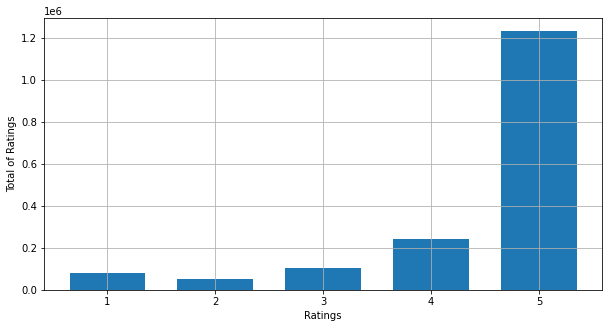

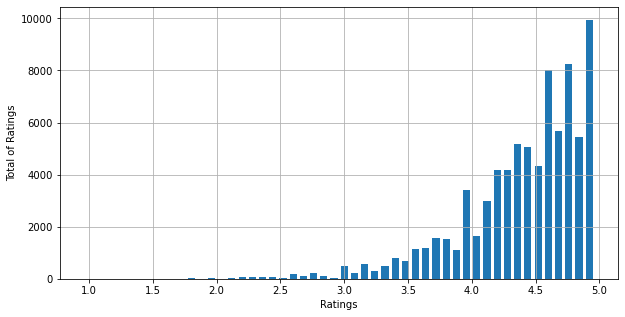

In [110]:
import matplotlib.pyplot as plt
import math

# antes do merge
reviews['overall'].hist(bins=range(1,7), figsize=(10,5),  align='left', rwidth=0.7)
plt.ylabel("Total of Ratings")
plt.xlabel("Ratings")
plt.show()


# depois do merge
reviewsMerged['overall'].hist(bins=50, figsize=(10,5),  align='left', rwidth=0.7)
plt.ylabel("Total of Ratings")
plt.xlabel("Ratings")
plt.show()